In [42]:
import numpy as np
import pandas as pd
import matplotlib as plt
import datetime
import types
from botocore.client import Config
import ibm_boto3

In [43]:
# The code was removed by Watson Studio for sharing.

,Company,Date,Closing (c),High (c),Low (c),Volume,# Deals,Value (R),Move (%),DY,EY,PE
0,MTN,2020-02-17,8820,8879,8725,2350702,3130,207 277 923,0.0112,0.0000,0.0000,0.0000
1,MTN,2020-02-14,8722,8873,8696,3895872,5710,340 272 727,-0.0072,4.7695,3.6344,27.5141
2,MTN,2020-02-13,8785,8978,8712,4837848,8169,425 234 479,-0.0028,4.7353,3.6084,27.7129
3,MTN,2020-02-12,8810,8961,8330,7969935,14546,701 183 321,0.06,4.7219,3.5981,27.7917
4,MTN,2020-02-11,8311,8385,8225,3576616,5561,297 254 218,0.0034,5.0054,3.8142,26.2176


 ## Cleaning data in dataframe

In [44]:
s = []
for n in df['Value (R)'][:]:
    s.append(str(n))
a = []
for n in s:
    a.append(float(''.join(n.split())))
df['Value'] = a
df.drop(["Value (R)"], axis=1, inplace=True)
df.dtypes

Company                object
Date           datetime64[ns]
Closing (c)             int64
High (c)                int64
Low (c)                 int64
Volume                  int64
# Deals                 int64
Move (%)               object
DY                    float64
EY                    float64
PE                    float64
Value                 float64
dtype: object

In [45]:
df.rename(columns={"Move (%)":"Move_Perc"}, inplace=True)
df.head()

,Company,Date,Closing (c),High (c),Low (c),Volume,# Deals,Move_Perc,DY,EY,PE,Value
0,MTN,2020-02-17,8820,8879,8725,2350702,3130,0.0112,0.0000,0.0000,0.0000,207277923.0
1,MTN,2020-02-14,8722,8873,8696,3895872,5710,-0.0072,4.7695,3.6344,27.5141,340272727.0
2,MTN,2020-02-13,8785,8978,8712,4837848,8169,-0.0028,4.7353,3.6084,27.7129,425234479.0
3,MTN,2020-02-12,8810,8961,8330,7969935,14546,0.06,4.7219,3.5981,27.7917,701183321.0
4,MTN,2020-02-11,8311,8385,8225,3576616,5561,0.0034,5.0054,3.8142,26.2176,297254218.0


In [46]:
df["Move_Perc"] = np.where((df.Move_Perc == '...'),0,df.Move_Perc)
s = []
for n in df["Move_Perc"][:]:
    s.append(str(n))
a = []
for n in s:
    a.append(float(''.join(n.split())))
df['Move_Percentage'] = a
df.drop(["Move_Perc"], axis=1, inplace=True)
df.dtypes

Company                    object
Date               datetime64[ns]
Closing (c)                 int64
High (c)                    int64
Low (c)                     int64
Volume                      int64
# Deals                     int64
DY                        float64
EY                        float64
PE                        float64
Value                     float64
Move_Percentage           float64
dtype: object

In [47]:
df1 = df.pivot(index="Date", columns="Company", values="Closing (c)").pct_change().apply(lambda x: np.log(1+x))
df1.sort_index(ascending=False, inplace=True)

In [48]:
df1.reset_index(0)
df1.head()

Company,BATS,DISCOVERY,FIRSTRAND,HARMONY,MTN,NASPERS,OLD MUTUAL,SAPPI,SASOL,TIGERBRANDS
Date,,,,,,,,,,
2020-02-26,0.0,0.0,0.055857,0.0,0.0,-0.004633,0.0,0.0,0.0,0.027918
2020-02-25,0.0,0.0,-0.013210,0.0,0.0,0.021468,0.0,0.0,0.0,-0.025642
2020-02-24,0.0,0.0,-0.041137,0.0,0.0,-0.043341,0.0,0.0,0.0,-0.051739
2020-02-21,0.0,0.0,-0.024877,0.0,0.0,-0.014674,0.0,0.0,0.0,-0.002401
2020-02-20,0.0,0.0,-0.018662,0.0,0.0,0.000973,0.0,0.0,0.0,-0.019416


## Creating a Covariance Matrix, Correlation Matrix and calculating Standard Deviation (annualised)

In [49]:
# Covariance Matrix (daily percentage returns)
cov = df1.cov()
cov

Company,BATS,DISCOVERY,FIRSTRAND,HARMONY,MTN,NASPERS,OLD MUTUAL,SAPPI,SASOL,TIGERBRANDS
Company,,,,,,,,,,
BATS,0.000186,0.000006,-0.000003,2.025608e-05,0.000013,2.572504e-05,0.000003,0.000046,0.000037,0.000010
DISCOVERY,0.000006,0.000312,0.000123,-9.185865e-06,0.000106,1.057475e-04,0.000153,0.000061,0.000072,0.000076
FIRSTRAND,-0.000003,0.000123,0.000423,-1.707865e-05,0.000199,1.731114e-04,0.000155,0.000127,0.000135,0.000140
HARMONY,0.000020,-0.000009,-0.000017,1.013204e-03,0.000011,-8.622525e-07,-0.000084,0.000085,0.000091,0.000011
MTN,0.000013,0.000106,0.000199,1.110070e-05,0.000665,1.833218e-04,0.000091,0.000105,0.000143,0.000109
NASPERS,0.000026,0.000106,0.000173,-8.622525e-07,0.000183,5.503304e-04,0.000089,0.000128,0.000137,0.000096
OLD MUTUAL,0.000003,0.000153,0.000155,-8.384992e-05,0.000091,8.883546e-05,0.000269,0.000092,0.000122,0.000080
SAPPI,0.000046,0.000061,0.000127,8.541569e-05,0.000105,1.280126e-04,0.000092,0.000635,0.000177,0.000079
SASOL,0.000037,0.000072,0.000135,9.125295e-05,0.000143,1.366968e-04,0.000122,0.000177,0.000486,0.000101


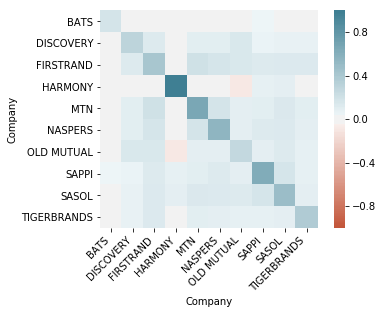

In [50]:
# Visualisation, (multiplied values but 1000 to accentuate colours)
import seaborn as sns

ax = sns.heatmap(
    cov*1000, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [51]:
# Correlation Matrix 
corr = df1.corr()
corr

Company,BATS,DISCOVERY,FIRSTRAND,HARMONY,MTN,NASPERS,OLD MUTUAL,SAPPI,SASOL,TIGERBRANDS
Company,,,,,,,,,,
BATS,1.000000,0.027247,-0.012435,0.046854,0.045221,0.088570,0.009958,0.127919,0.135448,0.033616
DISCOVERY,0.027247,1.000000,0.358909,-0.016179,0.249881,0.254222,0.454960,0.137750,0.193843,0.223602
FIRSTRAND,-0.012435,0.358909,1.000000,-0.025598,0.386327,0.345826,0.513092,0.237757,0.293121,0.342931
HARMONY,0.046854,-0.016179,-0.025598,1.000000,0.013373,-0.001147,-0.164639,0.106483,0.130049,0.017805
MTN,0.045221,0.249881,0.386327,0.013373,1.000000,0.299593,0.231100,0.158493,0.249906,0.217658
NASPERS,0.088570,0.254222,0.345826,-0.001147,0.299593,1.000000,0.198502,0.214969,0.264093,0.213145
OLD MUTUAL,0.009958,0.454960,0.513092,-0.164639,0.231100,0.198502,1.000000,0.218787,0.307399,0.264420
SAPPI,0.127919,0.137750,0.237757,0.106483,0.158493,0.214969,0.218787,1.000000,0.319157,0.163606
SASOL,0.135448,0.193843,0.293121,0.130049,0.249906,0.264093,0.307399,0.319157,1.000000,0.238884


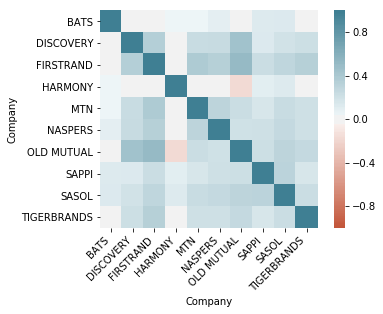

In [52]:
# Visualisation
import seaborn as sns

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [53]:
# Standard Deviation (annualised: used 365 days and might need to adjust for no of trading days)
std_dev = df1.apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(365))
std_dev

Company
BATS           0.260720
DISCOVERY      0.337861
FIRSTRAND      0.393049
HARMONY        0.607033
MTN            0.494856
NASPERS        0.453216
OLD MUTUAL     0.313892
SAPPI          0.498842
SASOL          0.422014
TIGERBRANDS    0.381598
dtype: float64

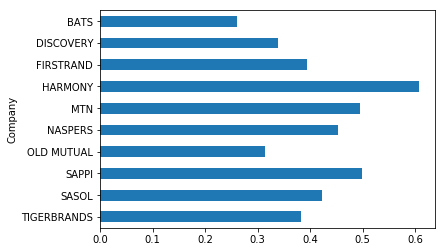

In [54]:
# Visualisation
std_dev.plot(kind='barh').invert_yaxis()

In [61]:
# Expected Returns (Annualised historical)
df2 = df.pivot(index="Date", columns="Company", values="Closing (c)")
exp_return = df2.resample("Y").last().pct_change().mean()
exp_return

Company
BATS           0.113333
DISCOVERY      0.145717
FIRSTRAND      0.134230
HARMONY        0.147028
MTN            0.230357
NASPERS        0.298389
OLD MUTUAL    -0.107193
SAPPI          0.060246
SASOL          0.147384
TIGERBRANDS    0.088701
dtype: float64

In [56]:
port_equities = pd.concat([std_dev,exp_return], axis=1)
port_equities.columns = ['Volatility', 'Returns']
port_equities

,Volatility,Returns
Company,,
BATS,0.260720,0.113333
DISCOVERY,0.337861,0.145717
FIRSTRAND,0.393049,0.134230
HARMONY,0.607033,0.147028
MTN,0.494856,0.230357
NASPERS,0.453216,0.298389
OLD MUTUAL,0.313892,-0.107193
SAPPI,0.498842,0.060246
SASOL,0.422014,0.147384


# Efficient Frontier

In [57]:
port_distribution = []
port_return = []
port_volitility = []

no_of_equities = len(df2.columns)
port_tests = 1000

In [58]:
for test in range(port_tests):
    weights = np.random.random(no_of_equities)
    weights = weights/np.sum(weights)
    port_distribution.append(weights)
    returns = np.dot(weights, exp_return)
    port_return.append(returns)
    port_variance = cov.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    port_std_deviation = np.sqrt(port_variance)
    annualise_port_sd = port_std_deviation*np.sqrt(365)
    port_volitility.append(annualise_port_sd)

In [59]:
f_frontier = {'Volatility' : port_volitility, 'Returns' : port_return}
for counter, symbol in enumerate(df2.columns.tolist()):
    f_frontier[symbol+' WTD'] = [w[counter] for w in port_distribution]
port_test_df = pd.DataFrame(f_frontier)
port_test_df.head()

,Volatility,Returns,BATS WTD,DISCOVERY WTD,FIRSTRAND WTD,HARMONY WTD,MTN WTD,NASPERS WTD,OLD MUTUAL WTD,SAPPI WTD,SASOL WTD,TIGERBRANDS WTD
0,0.205811,0.099533,0.164571,0.025824,0.110513,0.178960,0.041747,0.012821,0.132867,0.027670,0.137163,0.167864
1,0.228878,0.157573,0.125665,0.131433,0.015700,0.135618,0.032318,0.247509,0.022141,0.186601,0.048182,0.054834
2,0.221544,0.145256,0.136036,0.019026,0.089682,0.098430,0.146590,0.145719,0.069633,0.105199,0.129649,0.060037
3,0.218271,0.137660,0.067284,0.146560,0.087483,0.159451,0.142915,0.110194,0.113731,0.019765,0.087806,0.064812
4,0.245227,0.139373,0.048665,0.033866,0.206721,0.096725,0.185540,0.005834,0.009561,0.111475,0.170874,0.130739


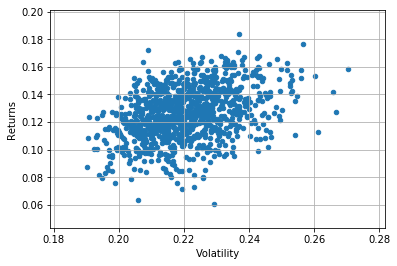

In [60]:
port_test_df.plot.scatter(x="Volatility", y="Returns", grid=True)